# Thumbnail Image Complexity Analysis

### Idea
Thumbnail images significantly influences people's decision to view webtoons. Therefore, prior to analyzing and forecasting webtoon popularity, it is necessary to quantify thumbnail images.

In this project, image complexity is proposed as one of the means of thumbnail image quantification. According to previous studies, image complexity can be evaluated using parameters such as JPG Compression, Information Entropy, and Edge Density.

### Procedure
0. Scraping Thumbnail images from the Naver Webtoon homepage.
1. JPG Compression
2. RGB Complexity with Shannon Entropy
3. Line Complexity with Canny Edge Detection

### References
[1] 이미지복잡도 측정 기술을 활용한 사용자 인터페이스의 시각복잡도 평가 (Huhn Kim et al, HCI Koera, 2013)\
[2] The XAOS Metric – Understanding Visual Complexity as Measure of Usability (Christian Stickel et al, HCI in Work and Learning, Life and Leisure, 2010)


In [1]:
# INPUT_DIR: <Your thumbnail directory, type=str>
# SHOW_SAMPLE: <Whether to show examples, type=Boolean>
INPUT_DIR = "dataset/thumbnails"
SHOW_SAMPLE = True

# 0. Load Thumbnail Images from Path
You should get thumbnail images by\
(1) download 'thumbnails.zip' from repository\
(2) or scrap from code of Team Project 'Webtoon Popularity Prediction'\
in advance

In [2]:
# Get image paths from path
from glob import glob
import os

paths = list(glob(os.path.join(INPUT_DIR,"*.jpg")))

print(f"Image from the directory: {INPUT_DIR}")
print(f"Total number of images is {len(paths)}")

Image from the directory: dataset/thumbnails
Total number of images is 547


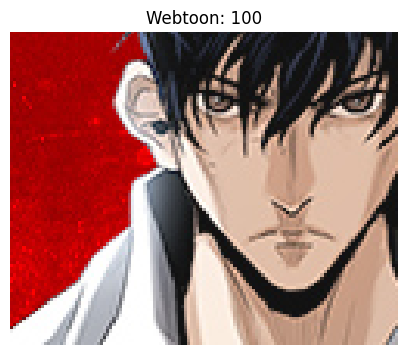

In [3]:
# Get image with PIL
import matplotlib.pyplot as plt
from skimage import io 
from PIL import Image

thumbs = []
titles = [] 

for path in paths:
    thumb = Image.open(path)
    thumbs.append(thumb)

    title = path.split('\\')[1].split('.')[0]
    titles.append(title)

if SHOW_SAMPLE:
    plt.figure(1, figsize=(5,5))
    plt.axis('off')
    plt.title(f"Webtoon: {titles[0]}")
    plt.imshow(thumbs[0])


# 1. JPG Compression
JPG Compression can simply calculated with os library. As seen below, JPG sizes are skewed left.

          Title  Sizes
0           100  14029
1     108명의 그녀들  15302
2          1331  13566
3         1을 줄게  10252
4            1초  14811
..          ...    ...
542  흔들리는 세계로부터  15966
543       희란국연가  13888
544      히어로 킬러  11878
545       히트포인트  12738
546        힙한남자   8499

[547 rows x 2 columns]


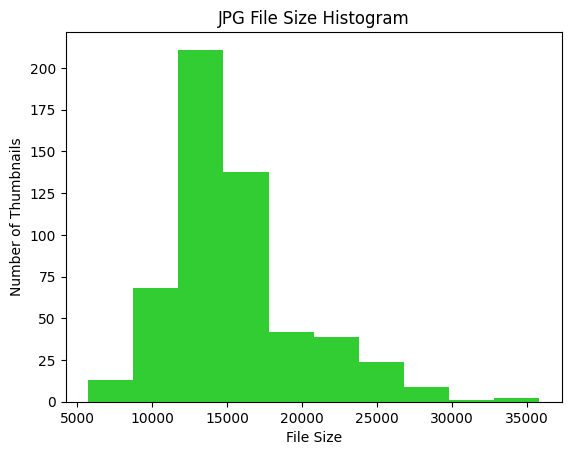

In [4]:
# Get JPG file size
import pandas as pd

sizes = [] 

for path in paths:
    size = os.path.getsize(path)
    sizes.append(size)

# Create dataframe and add columns
df = pd.DataFrame()
df['Title'] = titles
df['Sizes'] = sizes
print(df)

# Relationship between file size and number of thumbnails
plt.hist(df.Sizes, color='limegreen')
plt.title('JPG File Size Histogram')
plt.xlabel('File Size')
plt.ylabel('Number of Thumbnails')
plt.show()

--------JPG Size 상위 웹툰--------
          Title  Sizes
251        삼국지톡  35814
180      모어 라이프  32850
189     무용과 남학생  29963
504     프린스 메이커  29118
27   결혼까지 망상했어!  28944
--------JPG Size 하위 웹툰--------
        Title  Sizes
420     조조코믹스   5716
231       불청객   6489
248     사서고생!   6698
458  최강전설 강해효   6922
283   시벨롬 리스트   7356


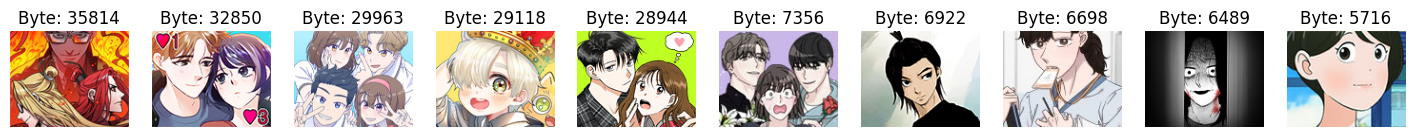

In [5]:
# Show thumbnails in top 5 and bottom 5
if SHOW_SAMPLE:
    print('--------JPG Size 상위 웹툰--------')
    print(df.nlargest(5, 'Sizes'))
    print('--------JPG Size 하위 웹툰--------')
    print(df.nsmallest(5, 'Sizes'))

    size10 = [251, 180, 189, 504, 27, 283, 458, 248, 231, 420]

    plt.figure(figsize = (18,18))

    for i in range(len(size10)):
        plt.subplot(1,10,i+1)
        plt.title('Byte: ' + str(df.Sizes[size10[i]]))
        plt.imshow(thumbs[size10[i]])
        plt.axis('off')

# 2. Entropy
In Information Theory, image entropy can be seen as the amount of information contained within the image. As the uncertainty of pixels increases, the amount of information also increases, leading to higher entropy.

XAOS utilizes both RGB entropy and Shannon entropy.

*Reference:*
https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python

In [6]:
# Create an entropy function
from skimage.measure.entropy import shannon_entropy
from scipy.stats import entropy as ent
from math import log, e
import numpy as np

def entropy(labels, base=None):
  '''RGB Entropy'''
  value,counts = np.unique(labels, return_counts=True)
  return ent(counts, base=base)

red= []
green = [] 
blue = [] 
se = [] 

for thumb in thumbs:
  t = np.array(thumb)
  red.append(entropy(t[:,:,2]))
  green.append(entropy(t[:,:,1]))
  blue.append(entropy(t[:,:,0]))
  se.append(shannon_entropy(thumb))

# Add to the dataframe
df_ent = pd.DataFrame()
df_ent['R'] = red
df_ent['G'] = green
df_ent['B'] = blue
df_ent['Shannon_ent'] = se
df_ent

,R,G,B,Shannon_ent
0,4.798898,4.547852,4.980696,7.171605
1,5.155010,5.178093,4.575242,7.384111
2,5.198644,5.242853,5.227726,7.612604
3,5.166783,5.093468,5.314536,7.650497
4,4.935439,4.982526,5.245134,7.502547
...,...,...,...,...
542,5.144121,5.206273,4.791961,7.354076
543,5.185261,5.207912,4.955136,7.569039
544,4.923024,4.887763,4.798737,7.241691
545,5.074418,5.120822,5.080112,7.601420


Text(0, 0.5, 'Shannon Entropy')

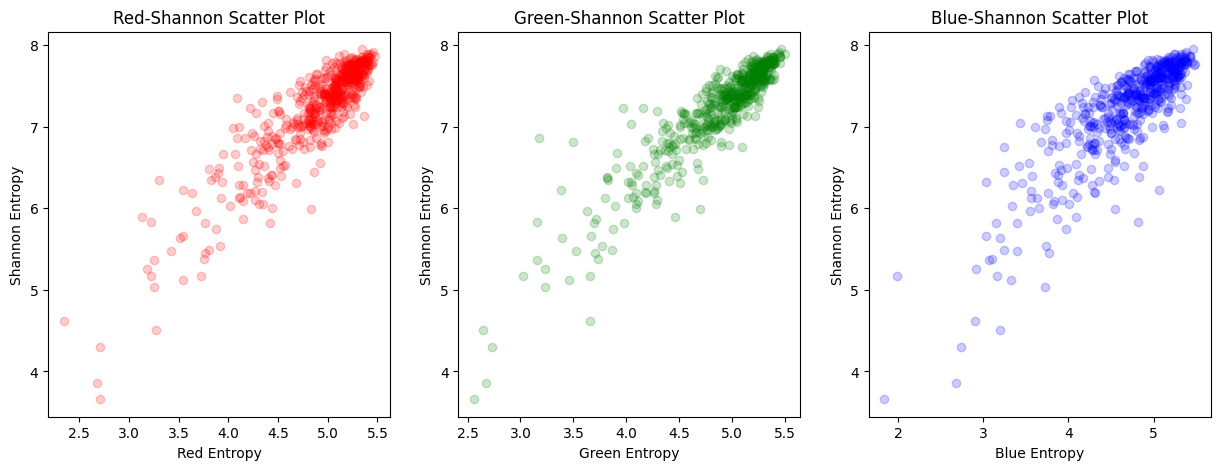

In [7]:
# Relationship between RGB entropy and Shannon entropy
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.scatter(x='R', y='Shannon_ent', data=df_ent, c='r', alpha=0.2)
plt.title('Red-Shannon Scatter Plot')
plt.xlabel('Red Entropy')
plt.ylabel('Shannon Entropy')

plt.subplot(1,3,2)
plt.scatter(x='G', y='Shannon_ent', data=df_ent, c='g', alpha=0.2)
plt.title('Green-Shannon Scatter Plot')
plt.xlabel('Green Entropy')
plt.ylabel('Shannon Entropy')

plt.subplot(1,3,3)
plt.scatter(x='B', y='Shannon_ent', data=df_ent, c='b', alpha=0.2)
plt.title('Blue-Shannon Scatter Plot')
plt.xlabel('Blue Entropy')
plt.ylabel('Shannon Entropy')

<bound method NDFrame.head of           Title  Sizes  Shannon_ent
0           100  14029     7.171605
1     108명의 그녀들  15302     7.384111
2          1331  13566     7.612604
3         1을 줄게  10252     7.650497
4            1초  14811     7.502547
..          ...    ...          ...
542  흔들리는 세계로부터  15966     7.354076
543       희란국연가  13888     7.569039
544      히어로 킬러  11878     7.241691
545       히트포인트  12738     7.601420
546        힙한남자   8499     6.952976

[547 rows x 3 columns]>


Text(0.5, 1.0, 'Size-Shannon Scatter Plot')

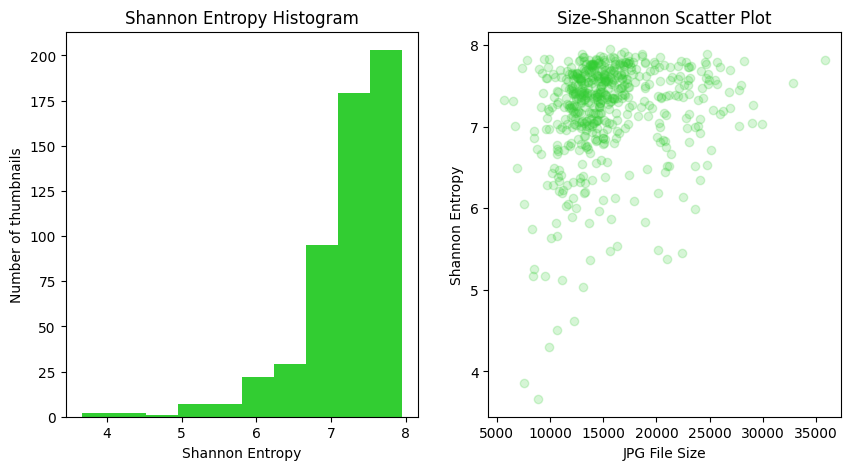

In [8]:
# Add Shannon entropy to the dataframe
df['Shannon_ent'] = se
print(df.head)

# Relationship between Shannon entropy and JPG file size
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.hist(df.Shannon_ent, color='limegreen')
plt.title('Shannon Entropy Histogram')
plt.xlabel('Shannon Entropy')
plt.ylabel('Number of thumbnails')

plt.subplot(1,2,2)
plt.scatter(x='Sizes', y='Shannon_ent', data=df, alpha=0.2, color='limegreen')
plt.xlabel('JPG File Size')
plt.ylabel('Shannon Entropy')
plt.title('Size-Shannon Scatter Plot')

--------Shannon Entropy 상위 웹툰 5--------
             Title  Sizes  Shannon_ent
308  아카데미에 위장취업당했다  15647     7.949999
119   던전 씹어먹는 아티팩트  16982     7.916404
480            태시트  24792     7.895733
406          재혼 황후  18688     7.894989
355     완벽한 부부는 없다  13017     7.894601
--------Shannon Entropy 하위 웹툰 5--------
          Title  Sizes  Shannon_ent
22    개와 사람의 시간   8895     3.660004
523  헬퍼 2  킬베로스   7556     3.863303
124        독립일기   9905     4.295117
280     스토커의 하루  10681     4.514309
467        쿠쿠쿠쿠  12259     4.614911


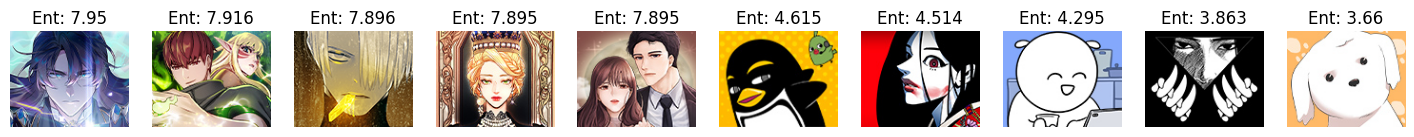

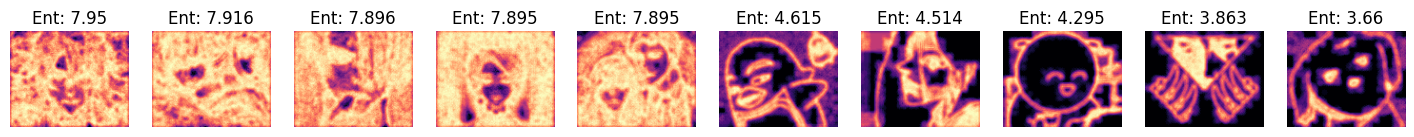

In [9]:
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk

# Show thumbnails in top 5 and bottom 5
if SHOW_SAMPLE:
    print('--------Shannon Entropy 상위 웹툰 5--------')
    print(df.nlargest(5, 'Shannon_ent'))
    print('--------Shannon Entropy 하위 웹툰 5--------')
    print(df.nsmallest(5, 'Shannon_ent'))

    se10 = [308, 119, 480, 406, 355, 467, 280, 124, 523, 22]

    plt.figure(figsize = (18,18))

    for i in range(len(se10)):
        plt.subplot(1,10,i+1)
        plt.title('Ent: ' + str(round(df.Shannon_ent[se10[i]],3)))
        plt.imshow(thumbs[se10[i]])
        plt.axis('off')

    # Visualize Entropy
    plt.figure(figsize = (18,18))

    for i in range(len(se10)):
        img = np.array(thumbs[se10[i]])
        img = entropy(img[:,:,0], disk(3))
        
        plt.subplot(1,10,i+1)
        plt.title('Ent: ' + str(round(df.Shannon_ent[se10[i]],3)))
        plt.imshow(img, cmap='magma')
        plt.axis('off')

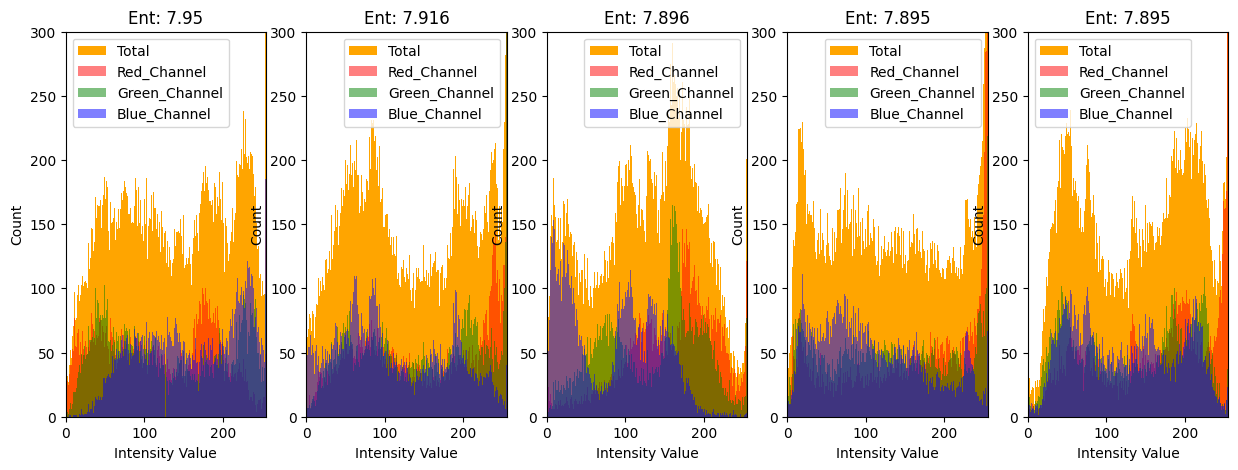

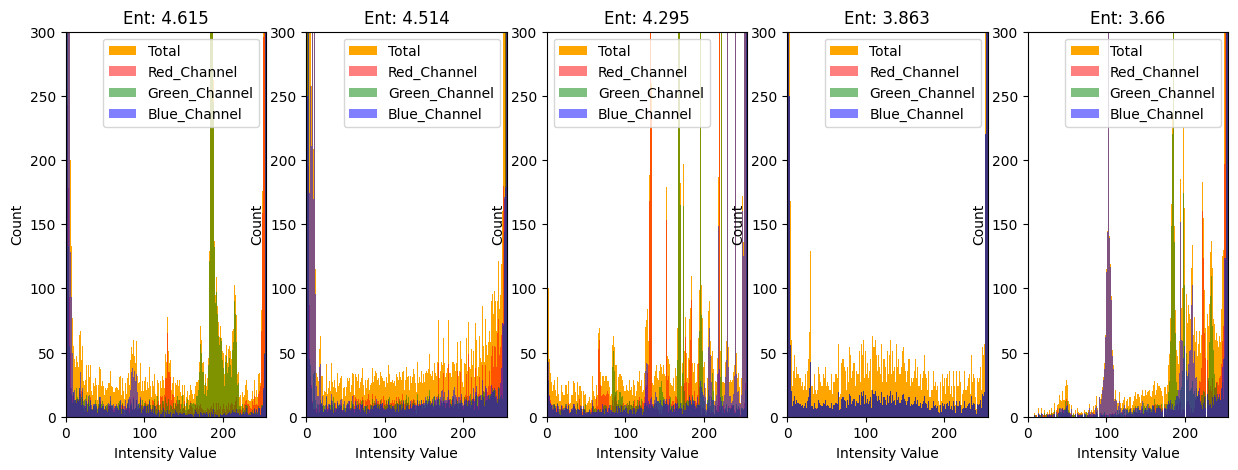

In [10]:
# Visualize RGB Channel
fig = plt.figure(figsize=(15,5))

for i in range(0,5):
    image = np.array(thumbs[se10[i]])
    ax = fig.add_subplot(1,5,i+1)
    ax.hist(image.ravel(), bins = 256, color = 'orange', )
    ax.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    ax.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    ax.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    
    ax.set_title('Ent: ' + str(round(df.Shannon_ent[se10[i]],3)))
    ax.set_xlabel('Intensity Value')
    ax.set_ylabel('Count')
    ax.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    ax.axis([0, 255, 0, 300])

plt.show()

fig = plt.figure(figsize=(15,5))

for i in range(5,10):
    image = np.array(thumbs[se10[i]])
    ax = fig.add_subplot(1,5,i-4)
    ax.hist(image.ravel(), bins = 256, color = 'orange', )
    ax.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    ax.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    ax.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    
    ax.set_title('Ent: ' + str(round(df.Shannon_ent[se10[i]],3)))
    ax.set_xlabel('Intensity Value')
    ax.set_ylabel('Count')
    ax.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    ax.axis([0, 255, 0, 300])

plt.show()

# 3. Canny Edge Detection
Canny Edge detection extracts edges in an image by utilizing the magnitude and direction of gradients. After extracting, calculate the line complexity with edge pixel. 


In [11]:
import cv2

edges = [] 
edge_pixel = []

for thumb in thumbs:
    gray = np.array(thumb.convert('L'))
    edge = cv2.Canny(gray, 50, 100)
    edges.append(edge)
    
    pixel = cv2.countNonZero(edge)
    edge_pixel.append(pixel)

df['Edge_pixel'] = edge_pixel
df

,Title,Sizes,Shannon_ent,Edge_pixel
0,100,14029,7.171605,2209
1,108명의 그녀들,15302,7.384111,2983
2,1331,13566,7.612604,3146
3,1을 줄게,10252,7.650497,1865
4,1초,14811,7.502547,2762
...,...,...,...,...
542,흔들리는 세계로부터,15966,7.354076,3647
543,희란국연가,13888,7.569039,3335
544,히어로 킬러,11878,7.241691,2934
545,히트포인트,12738,7.601420,2237


Text(0.5, 1.0, 'Shannon-Edge Scatter Plot')

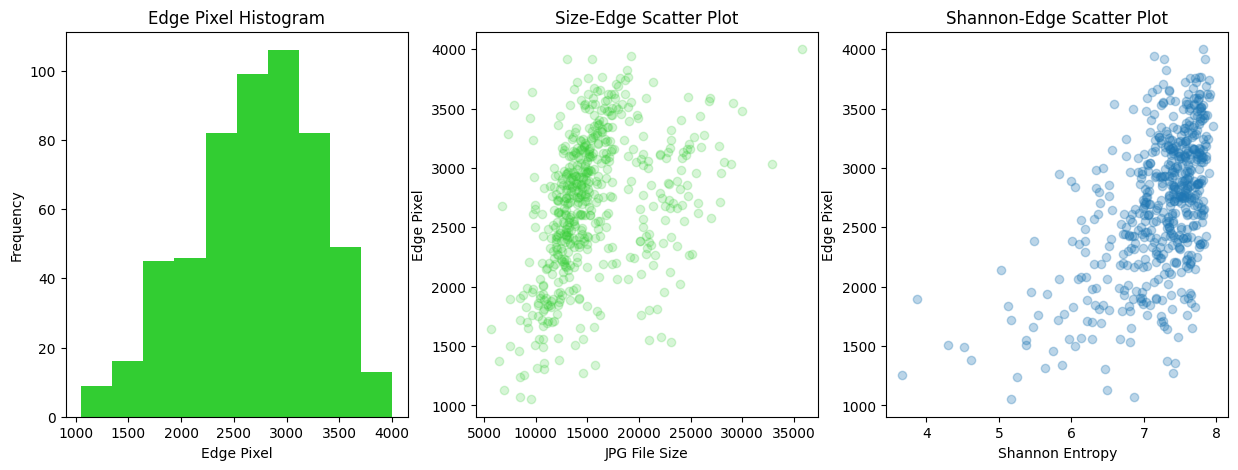

In [12]:
# Visualize Edge Pixel
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.hist(df.Edge_pixel, color='limegreen')
plt.xlabel('Edge Pixel')
plt.ylabel('Frequency')
plt.title('Edge Pixel Histogram')

plt.subplot(1,3,2)
plt.scatter(x='Sizes', y='Edge_pixel', data=df, alpha=0.2, color='limegreen')
plt.xlabel('JPG File Size')
plt.ylabel('Edge Pixel')
plt.title('Size-Edge Scatter Plot')

plt.subplot(1,3,3)
plt.scatter(x='Shannon_ent', y='Edge_pixel', data=df, alpha=0.3)
plt.xlabel('Shannon Entropy')
plt.ylabel('Edge Pixel')
plt.title('Shannon-Edge Scatter Plot')

--------Edge_pixel 상위 웹툰 5--------
                Title  Sizes  Shannon_ent  Edge_pixel
251              삼국지톡  35814     7.821360        4001
130    두 번째 딸로 태어났습니다  19221     7.136173        3942
464            칼가는 소녀  15475     7.275974        3917
418                제타  13071     7.850951        3916
242  사람은 고쳐 쓰는 게 아니야!  18856     7.311642        3830
--------Edge_pixel 하위 웹툰 5--------
         Title  Sizes  Shannon_ent  Edge_pixel
155     마루는 강쥐   9557     5.170122        1052
312     악몽의 형상   8510     6.867739        1067
458   최강전설 강해효   6922     6.497721        1126
469        클로닝   8478     5.250827        1236
22   개와 사람의 시간   8895     3.660004        1252


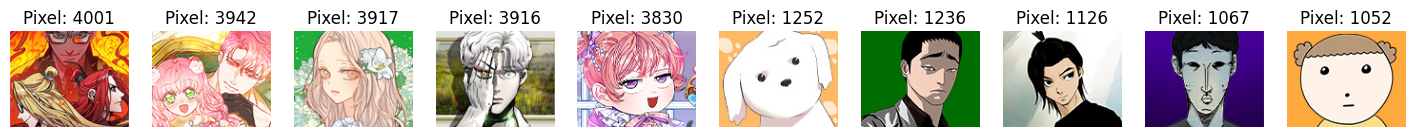

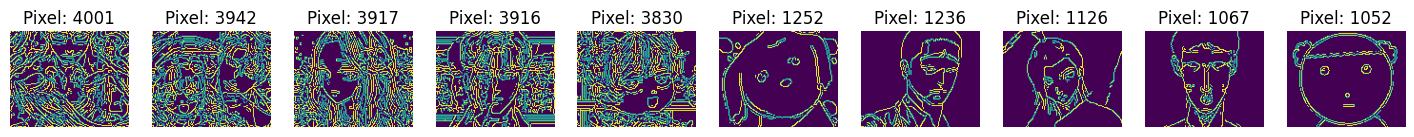

In [13]:
# Show thumbnails in top 5 and bottom 5
if SHOW_SAMPLE:
    print('--------Edge_pixel 상위 웹툰 5--------')
    print(df.nlargest(5, 'Edge_pixel'))
    print('--------Edge_pixel 하위 웹툰 5--------')
    print(df.nsmallest(5, 'Edge_pixel'))

    Edge_pixel10 = [251, 130, 464, 418, 242, 22, 469, 458, 312, 155]

    plt.figure(figsize = (18,18))

    for i in range(len(Edge_pixel10)):
        plt.subplot(1,10,i+1)
        plt.title('Pixel: ' + str(df.Edge_pixel[Edge_pixel10[i]]))
        plt.imshow(thumbs[Edge_pixel10[i]])
        plt.axis('off')

    plt.figure(figsize = (18,18))

    for i in range(len(Edge_pixel10)):
        plt.subplot(1,10,i+1)
        plt.title('Pixel: ' + str(df.Edge_pixel[Edge_pixel10[i]]))
        plt.imshow(edges[Edge_pixel10[i]])
        plt.axis('off')

In [14]:
# Save Result as csv
df.to_csv('네이버웹툰_기본정보(3)썸네일.csv', encoding = 'utf-8-sig')